In [54]:
import wbgapi as wb
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pytz
import seaborn as sns
import scipy.stats as stats
import statsmodels as sm
import plotly.express as px
from pandas import DataFrame
import plotly.express as px
from tabulate import tabulate
import plotly.graph_objs as go
import statsmodels.api
import statsmodels
import matplotlib.pyplot as plt
import plotly.graph_objects as go

warnings.filterwarnings('ignore')

<h1 style="color:black; background-color:white; padding:10px; padding-bottom:10px;text-align: center;">Methodology-for-Outliers-Detection</h1>

<h2 style="color:black; background-color:yellow; padding:5px; padding-bottom:10px; margin-bottom:-10px">I. Introduction</h2>
<p style="color:black; background-color:yellow; padding:5px; padding-bottom:20px;margin-bottom:-10px">
Handling missing data is an important step of any data analysis. In real life, the study of given processes and phenomena inevitably encounters missing data, which should be subject to peprocessing analysis. To reveal the nature of the missing data in general, whether they are completely random, random or non-random. To think about what could be done with them so as not to distort the database drastically, but on the contrary to improve their suitability for objective analysis. This report provides an overview of possible tools for dealing with missing data. The emphasis is not on their research, which as a methodology was done in a previous report, but on working with them. Different methods of visualization, imputation and removal are shown in order to enrich the theory and practice of data refinement as a pre-processing step in the field of economic data and others. 
<p style="color:black; background-color:yellow; padding:5px;padding-bottom:20px;margin-bottom:-10px">The minimum wage in the EU and countries close to the EU is used as an example database. Since the minimum wage is formed either on the basis of collective labor contracts, state decisions or on the basis of the change in basic parameters such as the average wage, etc. , its use is for purely educational purposes.</p>
<p style="color:black; background-color:yellow; padding:5px;">In this paper, we will focus on the imputation of missing data and the applicability of the algorithms in the minimum wage example. The basic logarithms of Univariate and Multivariate Imputation will be used. Their behavior will be evaluated and visualized.</p>

<h2 style="color:black; background-color:yellow; padding:5px; margin-bottom:-15px">Content</h2>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">The content of the empirical part of the report includes the following logical steps:</ul>
<li style="color:black; background-color:white; padding:5px">Import the database</li>
<li style="color:black; background-color:white; padding:5px">Check the missing values</li>
<li style="color:black; background-color:white; padding:5px">Dealing with missing values</li>
<li style="color:black; background-color:white; padding:5px">Visualization of imputation algorithms</li>

<h2 style="color:black; background-color:yellow; padding:5px; padding-bottom:10px; margin-bottom:-10px">II. Theoretical foundations of missing data.</h2>
<p style="color:black; background-color:white; padding:5px; margin-bottom:-15px"><b>Types of Missing data</b></p>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">There are four types of missing data:</ul>
<li style="color:black; background-color:white; padding:5px">Missing completely at random (MCAR): The fact that it is missing is independent of the remaining variables.</li>
<li style="color:black; background-color:white; padding:5px">Missing at random (MAR):  The missing value can roughly be interpolated from the remaining values to a reasonable degree of accuracy.</li>
<li style="color:black; background-color:white; padding:5px">Missing not at random (MNAR): The reason why the data is missing is related to the remaining variables</li>
<li style="color:black; background-color:white; padding:5px">Structurally Missing Data: The missing data is missing for а reason.</li>

<p style="color:black; background-color:white; padding:5px;  margin-bottom:-15px"><b>Methods for handling missing data</b></p>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">There are three methods at general:</ul>
<li style="color:black; background-color:white; padding:5px">Remove the missing data;</li>
<li style="color:black; background-color:white; padding:5px">Imputatе missing data;</li>
<li style="color:black; background-color:white; padding:5px">Keep the missing values;</li>

<h2 style="color:black; background-color:yellow; padding:5px; padding-bottom:10px; margin-bottom:-10px">III. Methodology and empirical analysis </h2>
<p style="color:black; background-color:white; padding:5px;margin-bottom:-10px">More information on Eurostat's minimum wage methodology please visit: https://ec.europa.eu/eurostat/cache/metadata/en/earn_minw_esms.htm </p>

<p style="color:black; background-color:white; padding:5px;margin-bottom:-10px"><b>Statistical concepts and definitions</b></p>
<p style="color:black; background-color:white; padding:5px;margin-bottom:-10px">Minimum wage statistics refer to national minimum wages. The basic national minimum wage is fixed at an hourly, weekly or monthly rate, and this minimum wage is enforced by law (the government), often after consultation with the social partners, or directly by national intersectoral agreement. The national minimum wage usually applies to all employees, or at least to a large majority of employees in the country. Gross wages are reported.</p>

<p style="color:black; background-color:white; padding:5px;margin-bottom:-10px"><b>Reference area</b></p>
<p style="color:black; background-color:white; padding:5px;margin-bottom:-10px">Minimum wage statistics cover EU Member States and the candidate countries with a national minimum wage. The national minimum wage is in 21 of the EU Member States: Belgium, Bulgaria, Czechia, Germany (from 1 January 2015), Estonia, Ireland, Greece, Spain, France, Croatia, Latvia, Lithuania, Luxembourg, Hungary, Malta, the Netherlands, Poland, Portugal, Romania, Slovenia and Slovakia.  In all these countries, except Belgium, the national minimum wage is enforced by the government, often after consultation with the social partners. In Belgium, the national minimum wage is set by national intersectoral agreement and acquires legal force by royal decree. The following candidate countries have a national minimum wage: Albania, North Macedonia, Montenegro, Serbia and Turkey. Data cover also the USA having a national minimum wage. Country-specific information is available in annex.</p>

<p style="color:black; background-color:white; padding:5px;margin-bottom:-10px">There is no national minimum wage in 6 EU Member States and the EFTA countries (data is flagged (z)):Cyprus: minimum wages are set by the government for some specific occupations. Denmark, Italy, Austria, Finland and Sweden as well as Iceland, Norway and Switzerland: minimum wages are set by sectoral collective agreements. </p>
<p style="color:black; background-color:white; padding:5px;margin-bottom:-10px">No EU aggregates are calculated due to the nature of the data: not all countries have a national minimum wage and the meaningfulness of a minimum wage at EU level (e.g. calculated as the mean of national minimum wages) is questionable.</p>
<p style="color:black; background-color:white; padding:5px;margin-bottom:-10px"><b>Reference Period</b>: Monthly minimum wages: 1 January (S1) and 1 July (S2)</p>
<p style="color:black; background-color:white; padding:5px;">More about the algorithms used in my current report visit: https://scikit-learn.org/stable/modules/impute.html#impute</p>

---

<h3 style="color:black; background-color:white; padding:5px; margin-bottom:-15px">Step one. Preprocessing</h3>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px"> In this first step, the database will be prepared using the following sub-steps:</ul>
<li style="color:black; background-color:white; padding:5px">Data from the World Bank database will be loaded;</li>
<li style="color:black; background-color:white; padding:5px">The key features of the data will be revealed;</li>
<li style="color:black; background-color:white; padding:5px">Missing data will be removed/li>
<li style="color:black; background-color:white; padding:5px">The data will be visualized</li>

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">Load the data</h4>
<p style="color:black; background-color:white; padding:5px;">
A function is created to load the data from the World Bank database according to selected parameters: employment and unemployment indicators with a worldwide scope.</p>

In [85]:
def load_and_name_db_WB (db, *args):
    global df_name
    df_name = db
    globals()[df_name] = wb.data.DataFrame(indicators, wb.region.members(region), range(start_period, end_period))
    globals()[df_name].columns = (new_column_names)
    return globals()[df_name]

In [86]:
name_db = "empl_unempl_world"
indicators = ['SL.UEM.TOTL.NE.ZS', "SL.EMP.TOTL.SP.NE.ZS"]
new_column_names = ['employment', "unemployment"]
region = "WLD"
start_period = 2015
end_period = 2016

load_and_name_db_WB(name_db, indicators, region, start_period, end_period)

,employment,unemployment
economy,,
ABW,NaN,NaN
AFG,NaN,NaN
AGO,NaN,NaN
ALB,45.959999,17.190001
AND,NaN,NaN
...,...,...
XKX,22.490000,32.840000
YEM,NaN,NaN
ZAF,44.500000,22.870001


<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">Extraction of basic information about the data</h4>
<p style="color:black; background-color:white; padding:5px;">
In addition to the previous substep, it is important to outline the database parameters such as size, number of cases, data type, etc. In this way, we will understand what the "idea" of the database is and what can and should be done with it in terms of technical content.</p>

In [67]:
def db_info (df):
    observations = None
    features = None
    observations, features = df.shape
    print("1. Оbservations and features: \n {} Оbservations and {} features".format(observations, features))
    print("------------------------------------------------------")
    print (f"2. Number of cases in the table: {df.size}")
    print("------------------------------------------------------")
    print(f"3. The sum of element types by type is as follows: \n {df.dtypes.value_counts(ascending=True)}")
    print("------------------------------------------------------")

    list_objects = []
    list_int = []
    list_float64 = []

    for col in df.columns:
        if df[col].dtypes == "object":
            list_objects += [col]
        elif df[col].dtypes == "float64":
            list_float64 += [col]
        elif df[col].dtypes == "int64" or df[col].dtypes == "int32":
            list_int += [col]
    print("4. Group the features by data type:")
    print(f" object = {list_objects} \n")
    print(f" int = {list_int} \n")
    print(f" float64 = {list_float64}")

In [87]:
db_info(empl_unempl_world)

1. Оbservations and features: 
 217 Оbservations and 2 features
------------------------------------------------------
2. Number of cases in the table: 434
------------------------------------------------------
3. The sum of element types by type is as follows: 
 float64    2
dtype: int64
------------------------------------------------------
4. Group the features by data type:
 object = [] 

 int = [] 

 float64 = ['employment', 'unemployment']


<p style="color:black; background-color:white; padding:5px;">We see that the data has 434 cases arranged in two columns whose values are floats and a total of 217 rows.</p>

---

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-5px">Missing values</h4>
<p style="color:black; background-color:white; padding:5px;">
In this substep, all missing values are removed.</p>

In [88]:
empl_unempl_world = empl_unempl_world.dropna(axis = 0, how = 'any')
empl_unempl_world

,employment,unemployment
economy,,
ALB,45.959999,17.190001
ARM,50.919998,18.260000
AUS,61.060001,6.050000
AUT,57.110001,5.800000
AZE,62.099998,4.960000
...,...,...
USA,59.340000,5.280000
UZB,68.190002,5.150000
VNM,75.769997,1.850000


<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-5px">Visualization</h4>
<p style="color:black; background-color:white; padding:5px;">
In this substep, we use a scatterplot to visualize the data for the two indicators.</p>

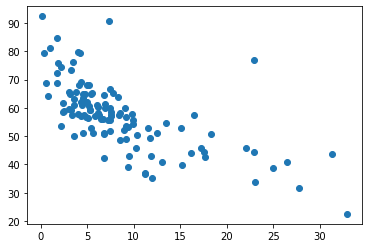

In [90]:
plt.scatter(empl_unempl_world["unemployment"], empl_unempl_world["employment"])
plt.show()

<p style="color:black; background-color:white; padding:5px;">The graph above shows how 114 countries around the world are positioned in terms of employment and unemployment levels in 2014-2015.</p>

---

<h3 style="color:black; background-color:white; padding:5px; margin-bottom:-15px">Step four: Outliers</h3>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">This step, which is central to this report, considers the following anomaly analysis toolkit:</ul>
<li style="color:black; background-color:white; padding:5px">1. Graphic techniques;</li>
<li style="color:black; background-color:white; padding:5px">2. Statistical techniques;</li>
<li style="color:black; background-color:white; padding:5px">3. Probalistics techniques;</li>
<li style="color:black; background-color:white; padding:5px">4. Distance-based tehniques;</li>
<li style="color:black; background-color:white; padding:5px">5. Density-based tehniques;</li>
<li style="color:black; background-color:white; padding:5px">6. Clustering tehniques;</li>
<li style="color:black; background-color:white; padding:5px">7. Tree-based tehniques;</li>
<li style="color:black; background-color:white; padding:5px">8. Linear tehniques;</li>
<li style="color:black; background-color:white; padding:5px">9. Deviation based tehniques;</li>
<li style="color:black; background-color:white; padding:5px">10. Neural-network based tehniques</li>

<h3 style="color:black; background-color:white; padding:5px; margin-bottom:-15px">1. Graph based tehniques</h3>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">The following basic graphical tools for anomaly visualizations will be covered here:</ul>
<li style="color:black; background-color:white; padding:5px">Histograms;</li>
<li style="color:black; background-color:white; padding:5px">Boxplots;</li>

<h4 style="color:black; background-color:white; padding:5px; margin-bottom:-5px">1.1. Histograms</h4>
<p style="color:black; background-color:white; padding:5px;">The histograms are the most commonly used graph to show frequency distributions.</p>

In [91]:
def histogram_outliers(df):
    for i in df:
        fig = px.histogram(df, x=i, marginal="box",width=700, height=400)
        fig.show(renderer="svg")

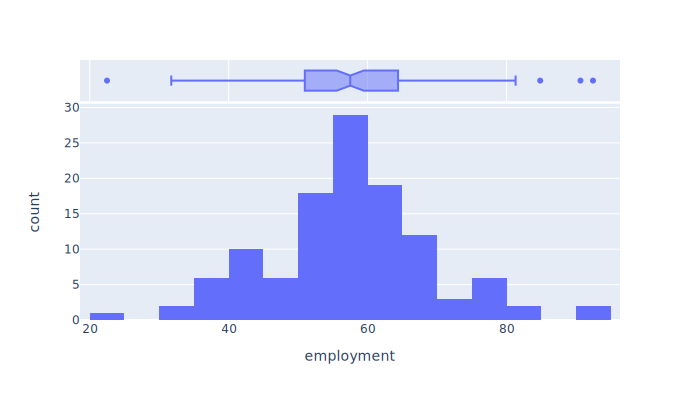

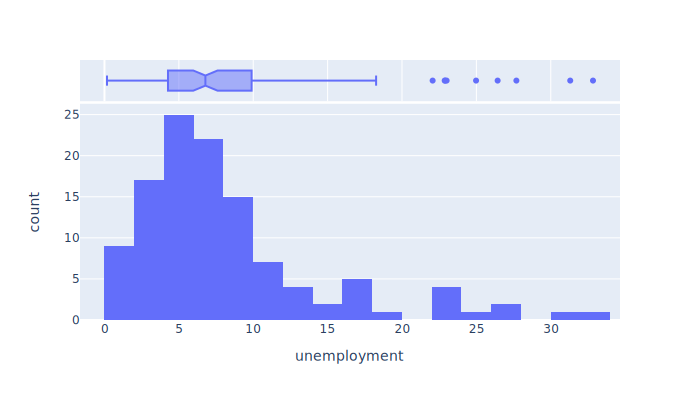

In [92]:
histogram_outliers(empl_unempl_world)

<p style="color:black; background-color:white; padding:5px;">Histograms show through their "tails" the possible presence of anomalies in the data distribution, indicator by indicator. In the case of the unemployment level, there is a clear possibility of anomalies.</p>

<h4 style="color:black; background-color:white; padding:5px; margin-bottom:-5px">1.2. Boxplot</h4>
<p style="color:black; background-color:white; padding:5px;">A boxplot is a way of displaying the distribution of data based on a five value summary ("minimum", "maximum", first quartile [Q1], median, third quartile [Q3])</p>

In [82]:
def boxplots_outliers(df):
    for x in df:
        fig = go.Figure()
        fig.add_trace(go.Box(
            y=df[x],
            name="All Points",
            jitter=0.3,
            pointpos=-1.8,
            boxpoints='all',
            marker_color='rgb(7,40,89)',
            line_color='rgb(7,40,89)'
        ))

        fig.add_trace(go.Box(
            y=df[x],
            name="Only Whiskers",
            boxpoints=False,
            marker_color='rgb(9,56,125)',
            line_color='rgb(9,56,125)'
        ))

        fig.add_trace(go.Box(
            y=df[x],
            name="Suspected Outliers",
            boxpoints='suspectedoutliers',
            marker=dict(
                color='rgb(8,81,156)',
                outliercolor='rgba(219, 64, 82, 0.6)',
                line=dict(
                    outliercolor='rgba(219, 64, 82, 0.6)',
                    outlierwidth=2)),
            line_color='rgb(8,81,156)'
        ))

        fig.add_trace(go.Box(
            y=df[x],
            name="Whiskers and Outliers",
            boxpoints='outliers',
            marker_color='rgb(107,174,214)',
            line_color='rgb(107,174,214)'
        ))


        fig.update_layout(title_text=x)
        fig.show(renderer="svg")

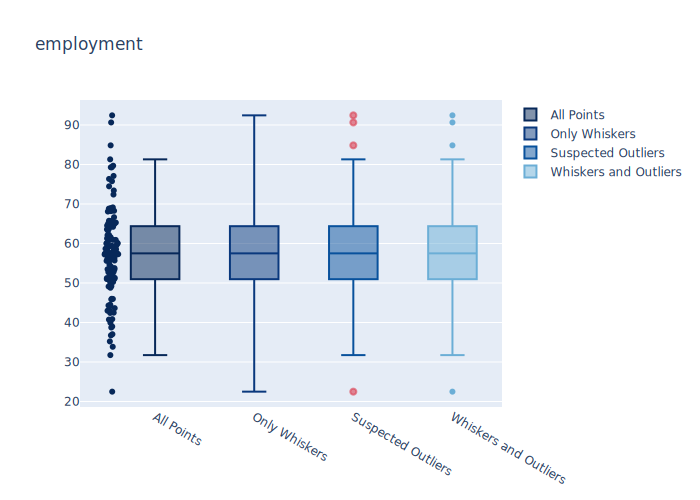

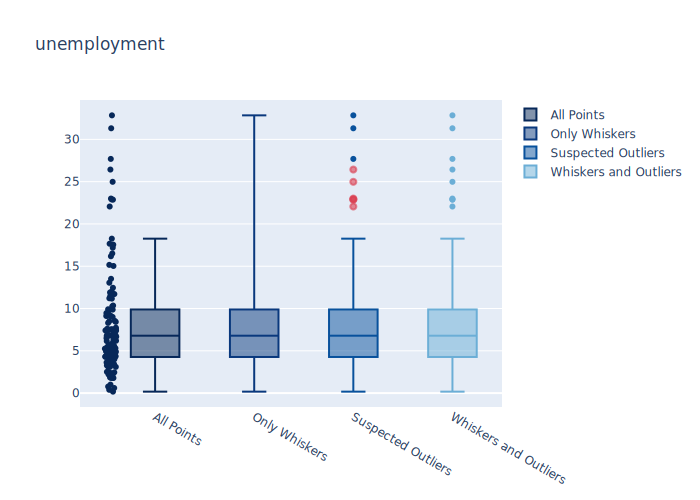

In [93]:
boxplots_outliers(empl_unempl_world)

<p style="color:black; background-color:white; padding:5px;">The boxplots clearly reveal the cases for each indicator that are anomalies according to the values they have.</p>

---

<h3 style="color:black; background-color:white; padding:5px; margin-bottom:-15px">2. Statistical tehniques</h3>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">The following basic statistical tools for anomaly detection will be covered here:</ul>
<li style="color:black; background-color:white; padding:5px">Common descriptive statistics;</li>
<li style="color:black; background-color:white; padding:5px">Z-score;</li>
<li style="color:black; background-color:white; padding:5px">Interquartile Range;</li>
<li style="color:black; background-color:white; padding:5px">Standard Deviation;</li>

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">2.1. Descriptive statistics</h4>
<p style="color:black; background-color:white; padding:5px"> The descriptive table gives us basic information about the data, its scope, distribution and shape.</p>

In [94]:
statsmodels.stats.descriptivestats.describe(empl_unempl_world).round(2)

,employment,unemployment
nobs,116.00,116.00
missing,0.00,0.00
mean,57.46,8.38
std_err,1.12,0.61
upper_ci,59.66,9.57
lower_ci,55.27,7.18
std,12.05,6.56
iqr,13.32,5.59
iqr_normal,9.87,4.15
mad,8.88,4.72


<p style="color:black; background-color:white; padding:5px;">Even at first glance, comparing the average value of the two indicators and the maximum values, we see the following: At 57% average value of the employment ratio, the maximum value is over 92%, which is 35 percentage points higher. In terms of unemployment, we have an average value of just over 8% and a maximum of over 32%.</p>

<h4 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">2.2. Z-score</h4>
<p style="color:black; background-color:yellow; padding:5px"> The descriptive table gives us basic information about the data, its scope, distribution and shape.</p>

In [227]:
def zscore_outliers(df, indicators):
    for indicator in indicators:
        outliers = []
        zscore = []
        threshold = 3
        mean = np.mean(df[indicator])
        std = np.std(df[indicator])
        
        for i in df[indicator]:
            z_score= (i - mean)/std 
            zscore.append(z_score)
            if np.abs(z_score) > threshold:
                outliers.append(i)
        print("Total number of outliers are",len(outliers))
        
        print(f"Outliers in Height column : \n{outliers}\n")

        plt.figure(figsize = (10,5))
        sns.distplot(zscore)
        plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.5, color='red')

Total number of outliers are 0
Outliers in Height column : 
[]

Total number of outliers are 2
Outliers in Height column : 
[31.3099994659424, 32.8400001525879]



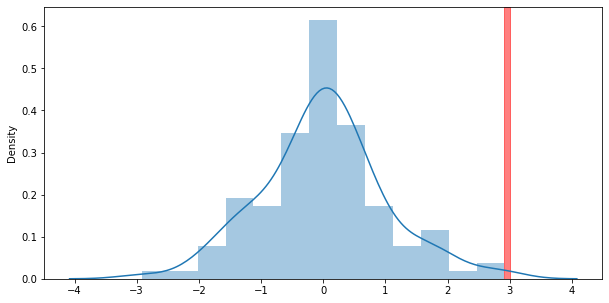

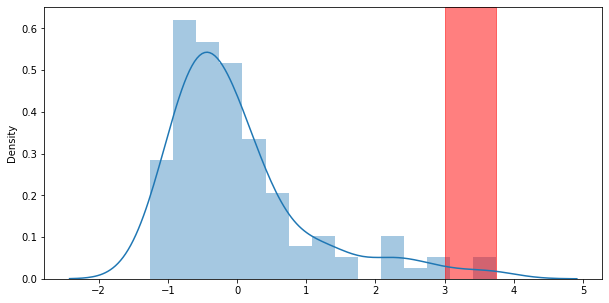

In [228]:
indicators = ["employment", "unemployment"]
out_zscore(empl_unempl_world, indicators)

In [224]:
def z_score(df, threshold=1):
    mean, std = np.mean(df), np.std(df)
    z_score = np.abs((df - mean) / std)
    good = z_score < threshold
    print(f"z-score of {threshold} corresponds to rejection {(~good).sum()} points")
    return good

def z_score_outliers(df, val1, val2):
    plt.figure(figsize=(12, 8))

    for i, threshold in zip(range(1, 5), range(1, 5)):
        plt.subplot(2, 2, i)
        good = z_score(df[val1], threshold=threshold)
        plt.scatter(df[val1][good], df[val2][good], s=10, label="Good", color="#4CAF50")
        plt.scatter(df[val1][~good], df[val2][~good], s=10, label="Bad", color="#F44336")
        plt.legend()
        plt.title(f"Sale Price Outliers (threshold={threshold})")

    plt.tight_layout()

z-score of 1 corresponds to rejection 25 points
z-score of 2 corresponds to rejection 9 points
z-score of 3 corresponds to rejection 2 points
z-score of 4 corresponds to rejection 0 points


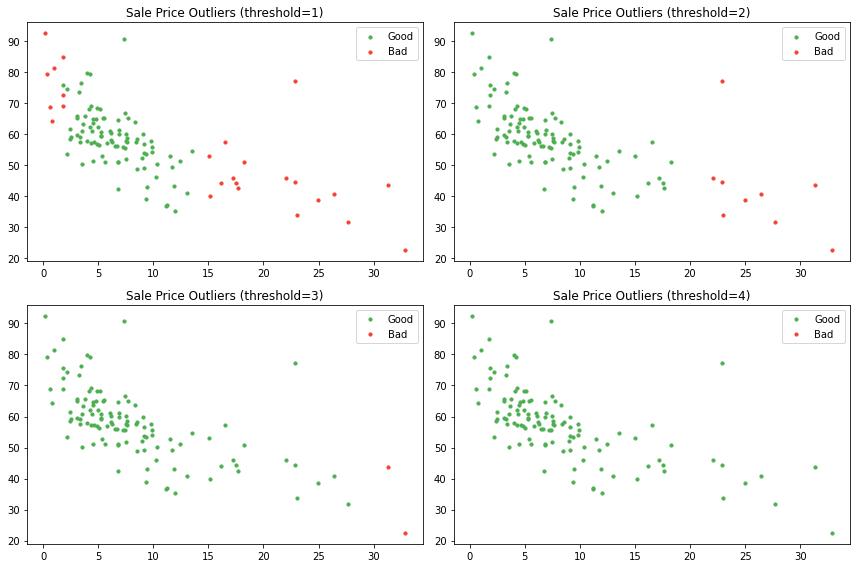

In [225]:
key_value = 'unemployment'
other_value = "employment"
z_score_outliers(empl_unempl_world, key_value,other_value)

z-score of 1 corresponds to rejection 32 points
z-score of 2 corresponds to rejection 5 points
z-score of 3 corresponds to rejection 0 points
z-score of 4 corresponds to rejection 0 points


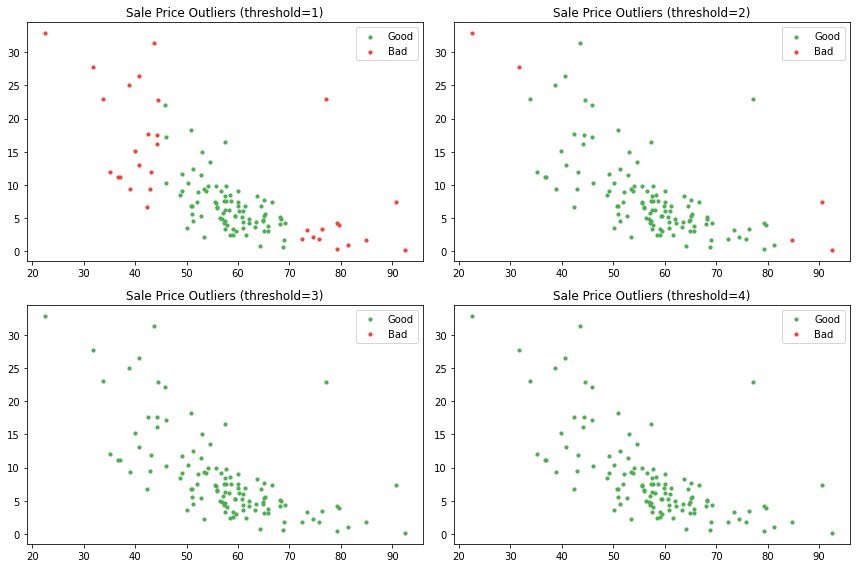

In [226]:
key_value = 'employment'
other_value = "unemployment"
z_score_outliers(empl_unempl_world, key_value,other_value)

<p style="color:black; background-color:white; padding:5px;">The graphs clearly complements the findings regarding the presence of outliers in the unemployment rate. At different levels of threshold the outliers are visualized precisely. Usually z-score =3 is considered as a cut-off value to set the limit. Therefore, any z-score greater than +3 or less than -3 is considered as outlier. </p> 

---